In [1]:
# noqa
import wandb
import matplotlib.pyplot as plt
import numpy as np

from plot_utils import plot_setting

In [2]:
plot_setting(font_size=18)

In [3]:
def retrieve_test_loss(run_id):
    run = wandb.Api().run(run_id)
    metric_history = run.history(keys=["eval/loss"])
    values = metric_history["eval/loss"].to_numpy()
    steps = metric_history["_step"].to_numpy()
    return steps, values

## Different time embedding dimension

In [50]:
dim_48 = "anhth/qkvflow/our_large_owt_v5_smaller_dim"
dim_96 = "anhth/qkvflow/our_large_owt_v5"
dim_144 = "anhth/qkvflow/our_large_owt_v5_bigger_dim"
gpt = "anhth/qkvflow/gpt_large_owt"

In [54]:
run_ids = [dim_48, dim_96, dim_144, gpt]

In [55]:
steps = None
test_losses = []
for run_id in run_ids:
    steps, test_loss = retrieve_test_loss(run_id)
    test_losses.append(test_loss)

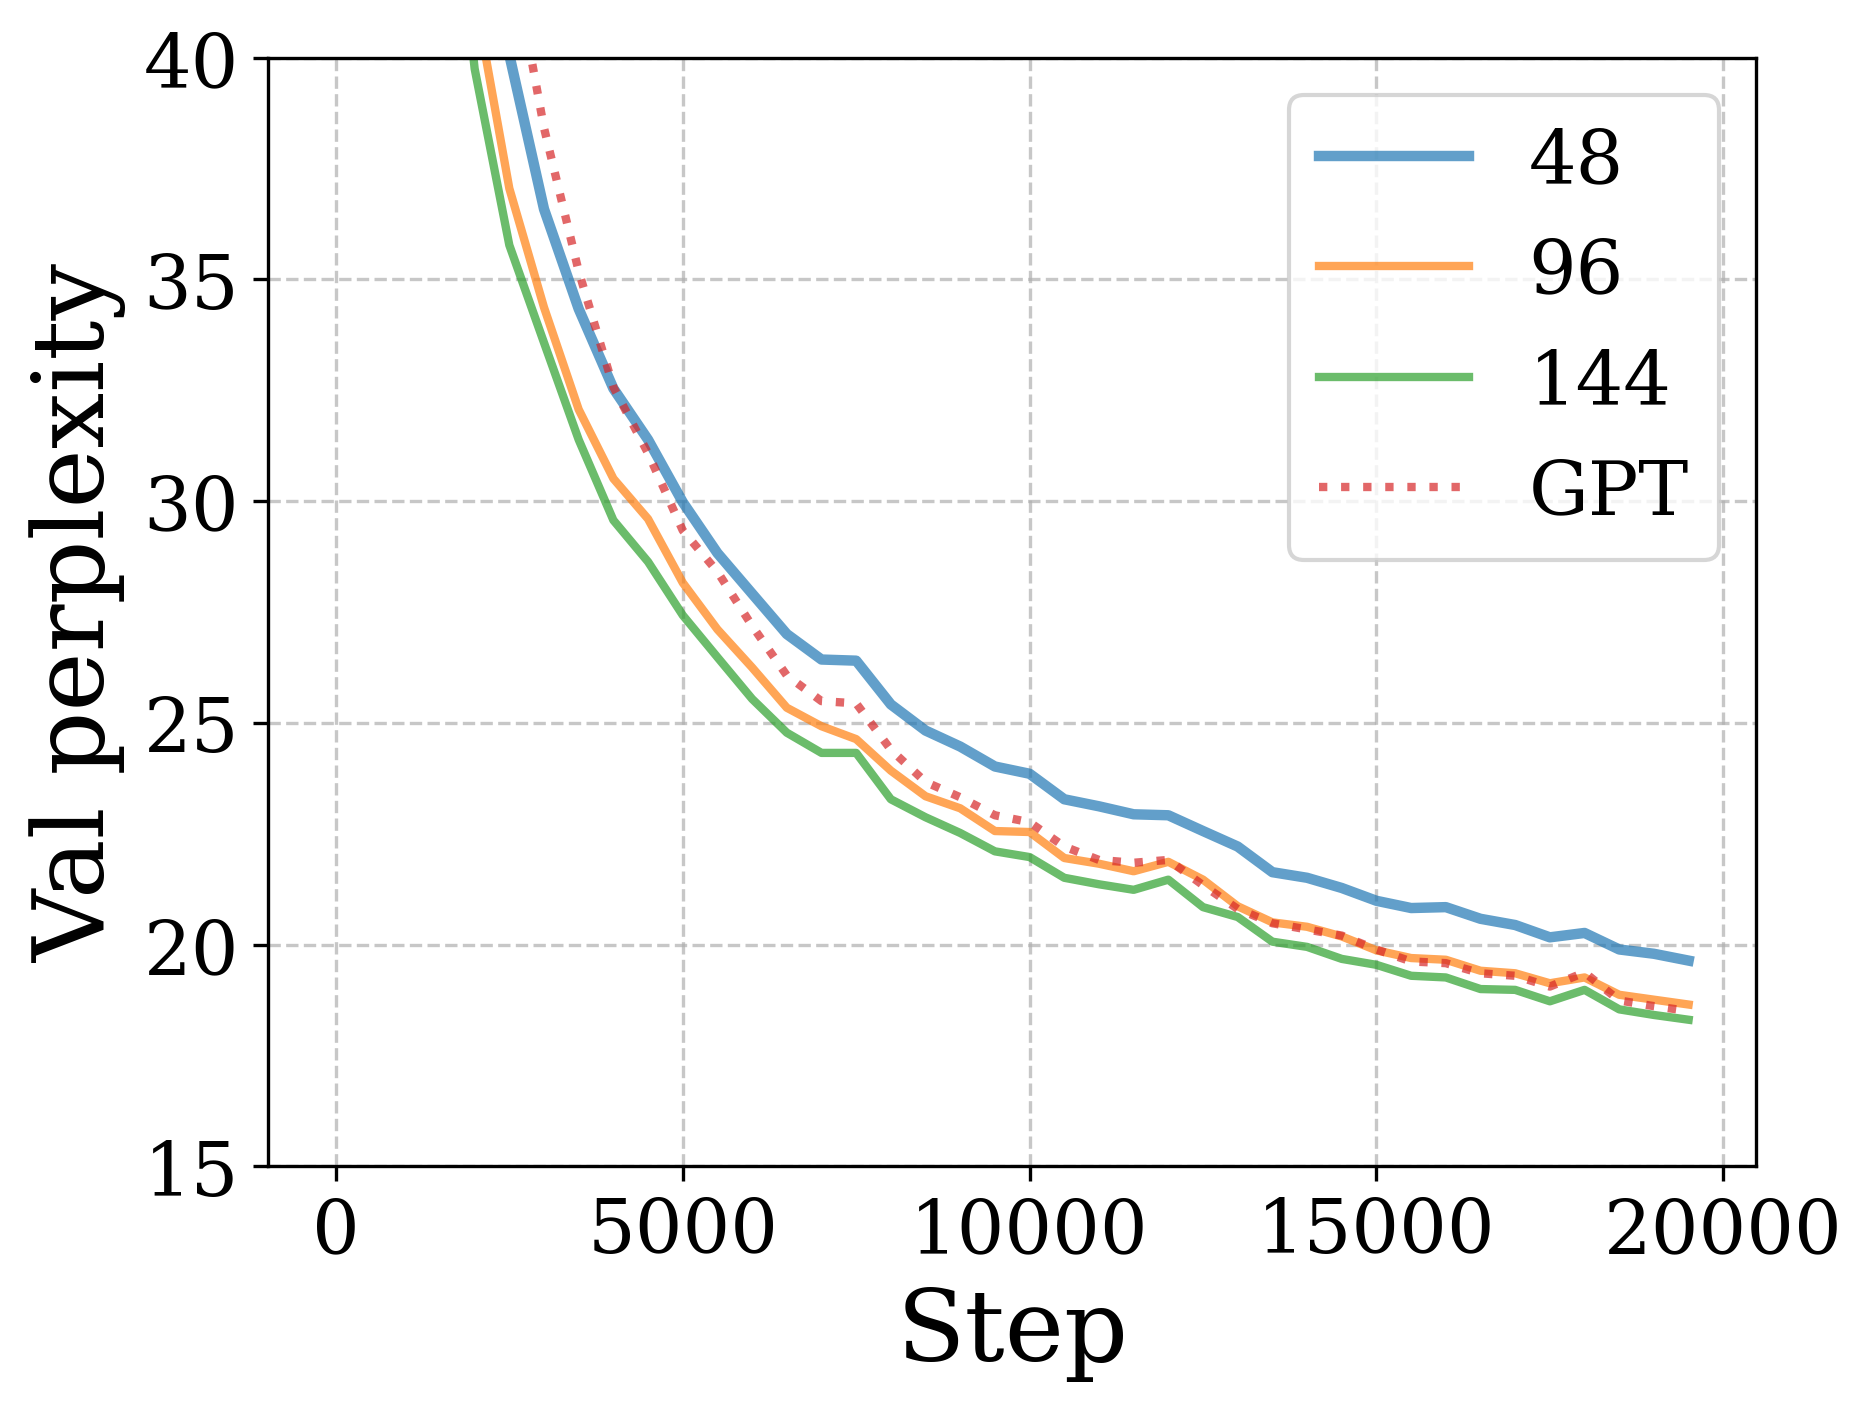

In [59]:
plt.plot(
    steps[:40], np.exp(test_losses[0][:40]), "-", linewidth=2.5, alpha=0.7, label="48"
)
plt.plot(
    steps[:40], np.exp(test_losses[1])[:40], "-", linewidth=2, alpha=0.7, label="96"
)
plt.plot(
    steps[:40], np.exp(test_losses[2])[:40], "-", linewidth=2, alpha=0.7, label="144"
)
plt.plot(
    steps[:40], np.exp(test_losses[3])[:40], ":", linewidth=2, alpha=0.7, label="GPT"
)

plt.ylim(15, 40)
plt.xlabel("Step", fontsize=24)
plt.ylabel("Val perplexity", fontsize=24)

plt.legend()
plt.savefig(
    "../output/figures/perplexity/perplexity_varying_dim.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.savefig(
    "../output/figures/perplexity/perplexity_varying_dim.jpg",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

## Compair different choices

In [ ]:
shared_mlp = "anhth/qkvflow/our_large_owt_old_3"
our = "anhth/qkvflow/our_large_owt_v5"
same_level_attn_mlp = "anhth/qkvflow/attnmlp_large_owt"
gpt = "anhth/qkvflow/gpt_large_owt"

## Wiki - small

In [27]:
small_20 = "anhth/qkvflow/our_small_wiki_v5"
small_gpt = "anhth/qkvflow/wywrvbrx"

In [28]:
run_ids = [small_20, small_gpt]

In [29]:
steps = None
test_losses = []
for run_id in run_ids:
    steps, test_loss = retrieve_test_loss(run_id)
    test_losses.append(test_loss)

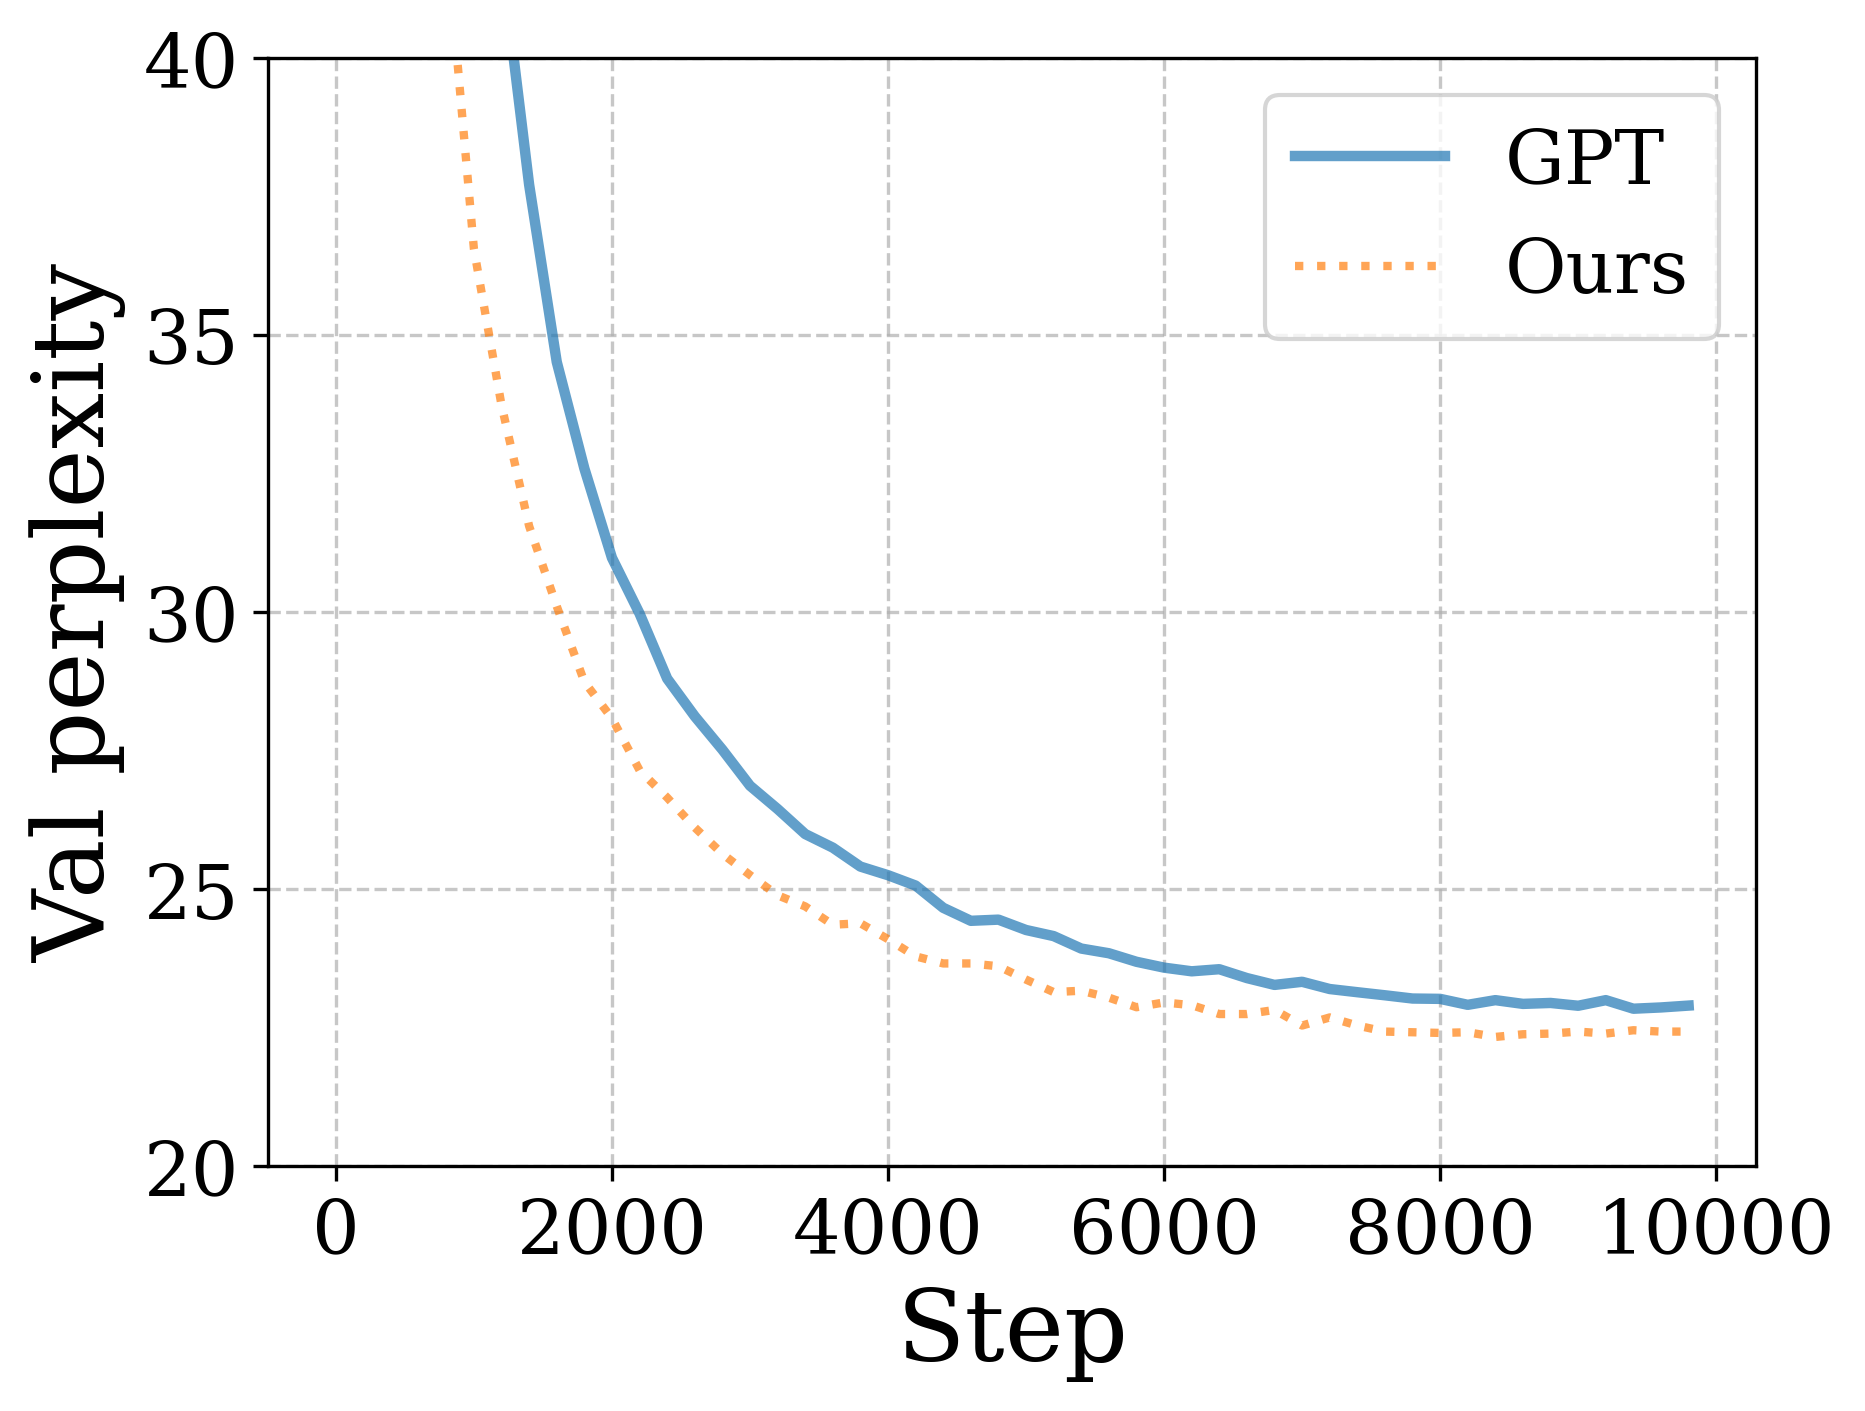

In [30]:
plt.plot(steps, np.exp(test_losses[1]), "-", linewidth=2.5, alpha=0.7, label="GPT")
plt.plot(steps, np.exp(test_losses[0])[1:], ":", linewidth=2, alpha=0.7, label="Ours")

plt.legend()
plt.ylim(20, 40)
plt.xlabel("Step", fontsize=24)
plt.ylabel("Val perplexity", fontsize=24)

plt.savefig(
    "../output/figures/perplexity/perplexity_small_wiki.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.savefig(
    "../output/figures/perplexity/perplexity_small_wiki.jpg",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

## Wiki - medium

In [4]:
medium_48 = "anhth/qkvflow/our_medium_wiki_48"
medium_gpt = "anhth/qkvflow/4k6d4soh"

In [5]:
run_ids = [medium_48, medium_gpt]

In [6]:
steps = None
test_losses = []
for run_id in run_ids:
    steps, test_loss = retrieve_test_loss(run_id)
    test_losses.append(test_loss)

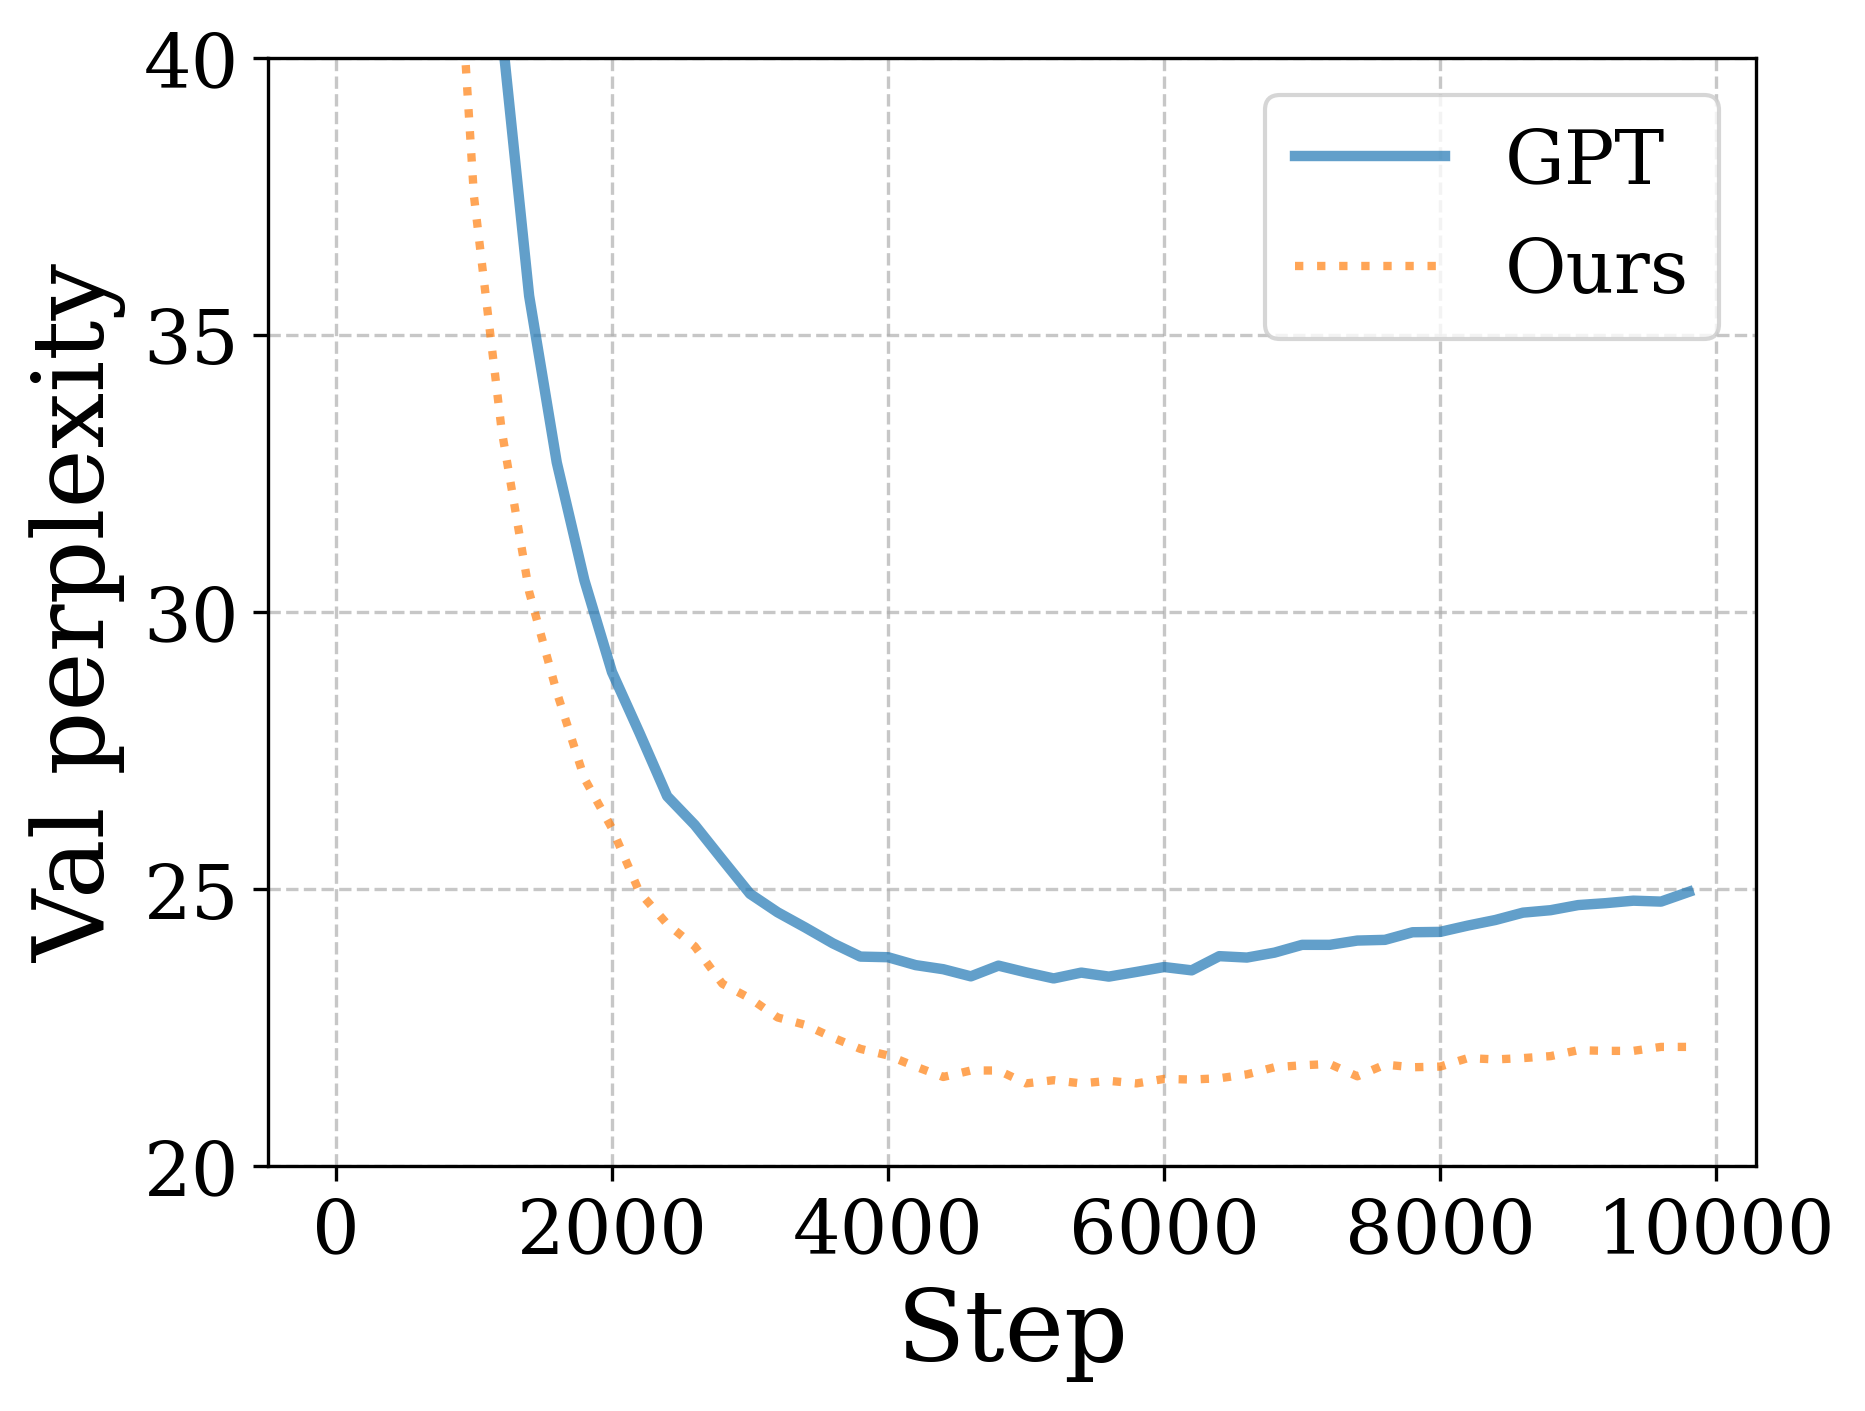

In [8]:
plt.plot(steps, np.exp(test_losses[1]), "-", linewidth=2.5, alpha=0.7, label="GPT")
plt.plot(steps, np.exp(test_losses[0])[1:], ":", linewidth=2, alpha=0.7, label="Ours")

plt.legend()
plt.ylim(20, 40)
plt.xlabel("Step", fontsize=24)
plt.ylabel("Val perplexity", fontsize=24)

plt.savefig(
    "../output/figures/perplexity/perplexity_medium_wiki.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.savefig(
    "../output/figures/perplexity/perplexity_medium_wiki.jpg",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

## OWT-small

In [35]:
small_20 = "anhth/qkvflow/our_small_owt_v5_2"
small_gpt = "anhth/qkvflow/0hy66tsz"

In [36]:
run_ids = [small_20, small_gpt]

In [37]:
steps = None
test_losses = []
for run_id in run_ids:
    steps, test_loss = retrieve_test_loss(run_id)
    test_losses.append(test_loss)

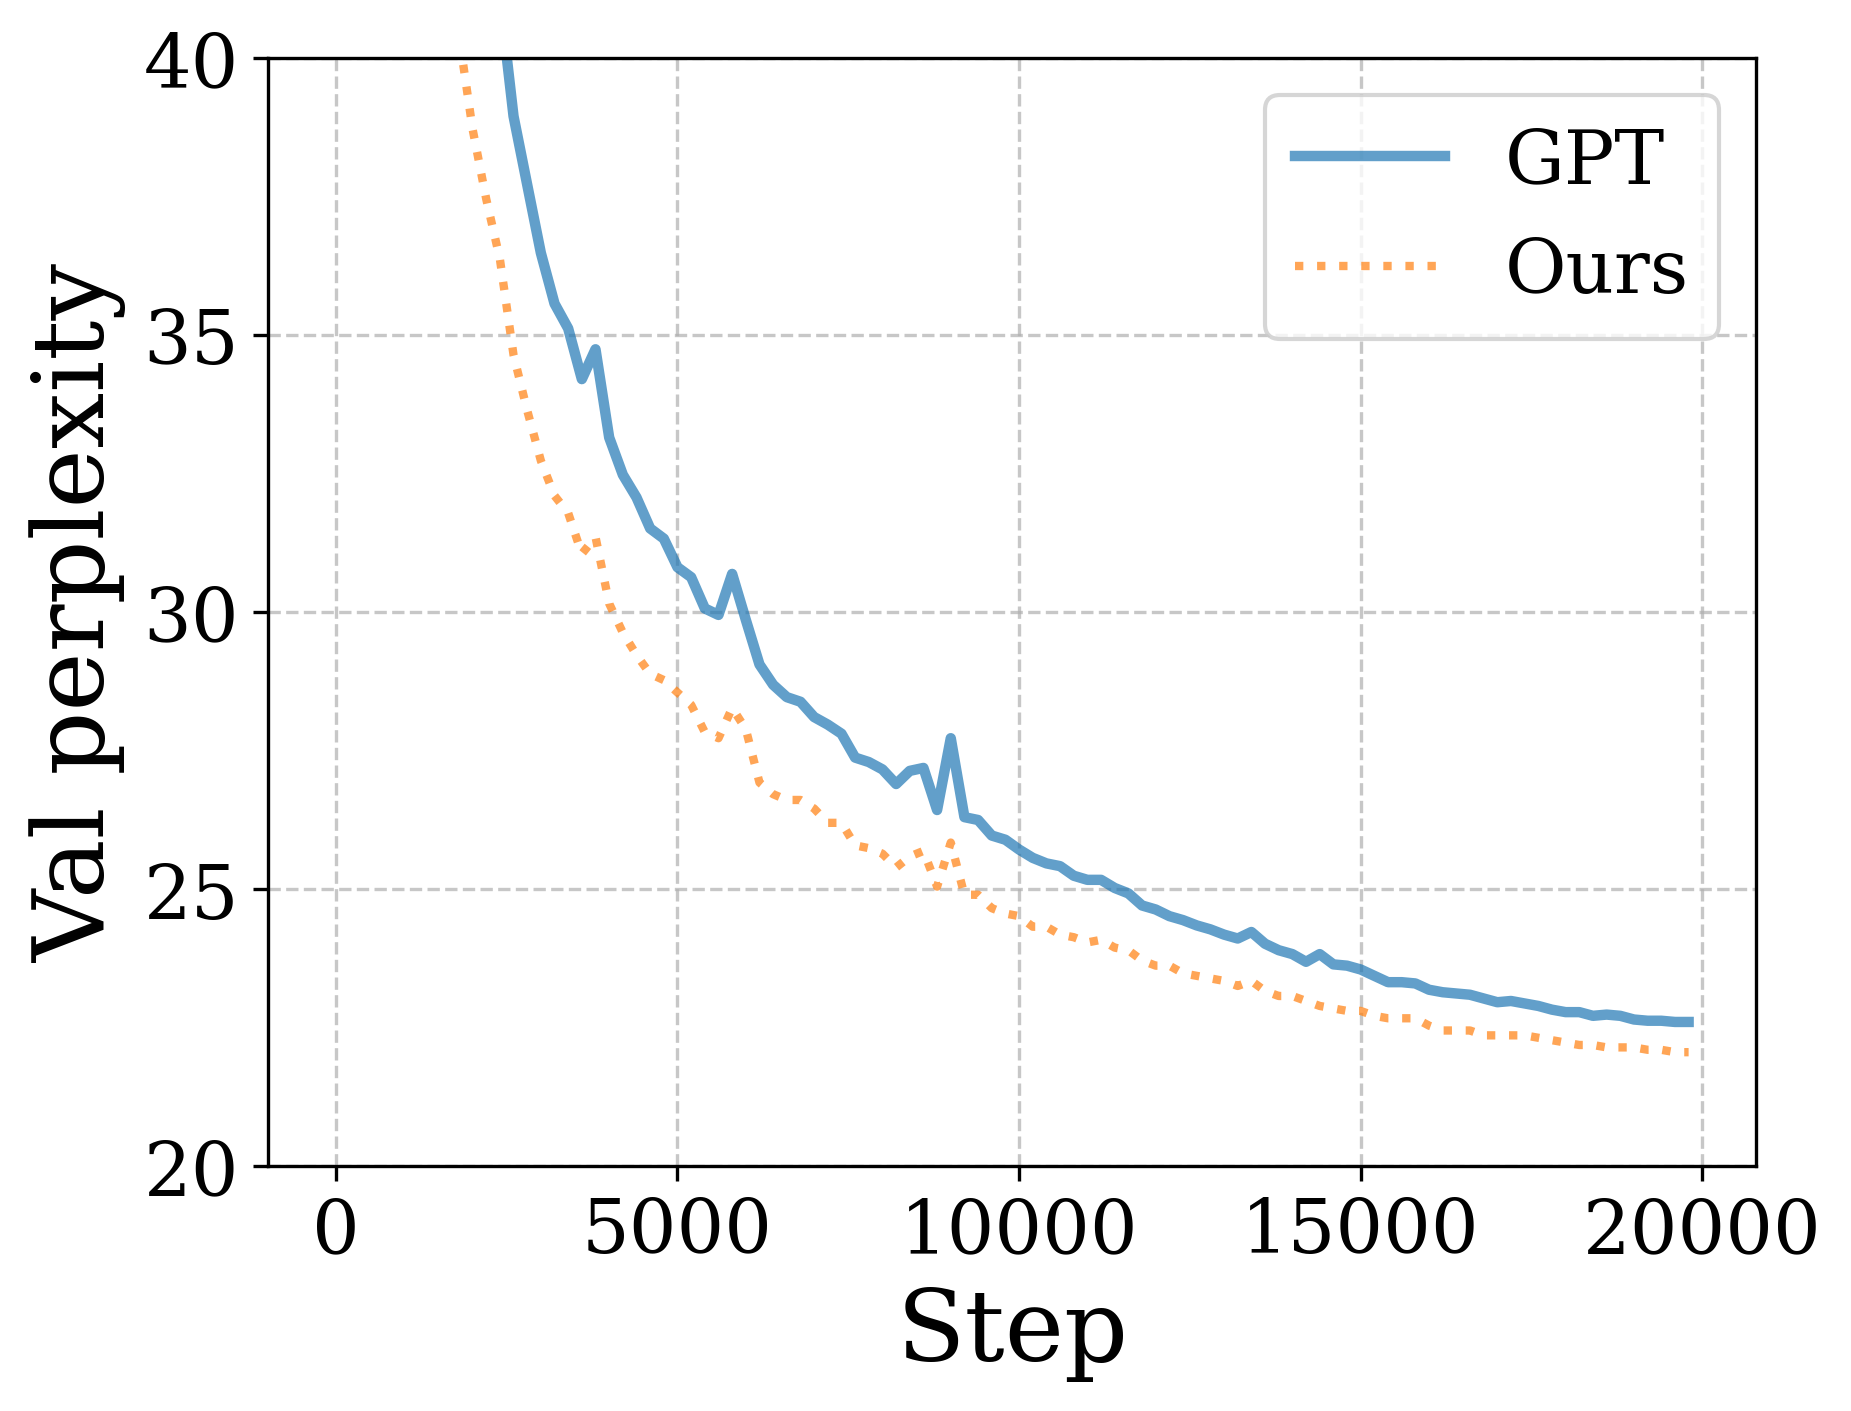

In [38]:
plt.plot(steps, np.exp(test_losses[1]), "-", linewidth=2.5, alpha=0.7, label="GPT")
plt.plot(steps, np.exp(test_losses[0]), ":", linewidth=2, alpha=0.7, label="Ours")

plt.legend()
plt.xlabel("Step", fontsize=24)
plt.ylabel("Val perplexity", fontsize=24)
plt.ylim(20, 40)
plt.xticks([0, 5000, 10000, 15000, 20000])
plt.yticks([20, 25, 30, 35, 40])

plt.savefig(
    "../output/figures/perplexity/perplexity_small_owt.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.savefig(
    "../output/figures/perplexity/perplexity_small_owt.jpg",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)